In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.float_format = '{:20,.2f}'.format

from env import user, host, password
import acquire
import summarize
import prepare

np.random.seed(5)

iris = acquire.get_iris_data()

In [2]:
iris.head()

,petal_length,petal_width,sepal_length,sepal_width,species_id,species_name
0,1.40,0.20,5.10,3.50,1,setosa
1,1.40,0.20,4.90,3.00,1,setosa
2,1.30,0.20,4.70,3.20,1,setosa
3,1.50,0.20,4.60,3.10,1,setosa
4,1.40,0.20,5.00,3.60,1,setosa


In [3]:
iris = iris.drop(columns="species_id")

### How the algorithm works:

    - Find Centers (or start randomly)
    
    - Assign Each data point to its closest center using a distance metrics (ie. - Euclidean distance formula)
    
    - Recalculate Centers (calculate the mean of each center)
    
    - Repeat!

In [4]:
kmeans = KMeans(n_clusters=3)

In [11]:
X = iris.drop(columns="species_name")

In [12]:
type(X)

pandas.core.frame.DataFrame

In [6]:
# .fit changes the kmeans object inplace, it modifies the object
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_length,petal_width,sepal_length,sepal_width
0,4.39,1.43,5.90,2.75
1,1.46,0.25,5.01,3.43
2,5.74,2.07,6.85,3.07


### Inertia == The total distance from each point to the cluster center

In [9]:
kmeans.inertia_

78.85144142614601

Text(0, 0.5, 'Inertia')

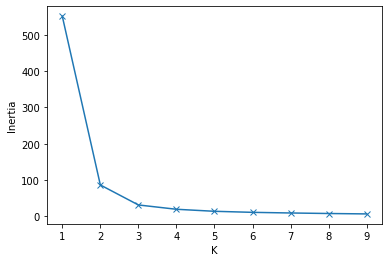

In [14]:
iris_subset = iris[["petal_length", "petal_width"]]

k_values = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(iris_subset)
    inertias.append(kmeans.inertia_)
    k_values.append(k)
    
plt.plot(k_values, inertias, marker="x")
plt.xlabel("K")
plt.ylabel("Inertia")
    